Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
type of mnist <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
type of original images <class 'numpy.ndarray'>
shape of original images (55000, 784)
type of images <class 'numpy.ndarray'>
shape of images (55000, 28, 28)
type of labels <class 'numpy.ndarray'>
shape of labels (55000,)
label 1


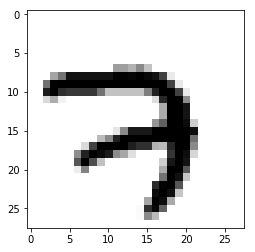

label 7


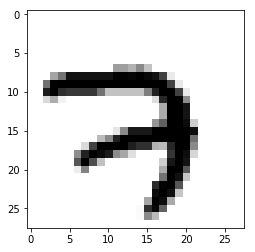

label 7


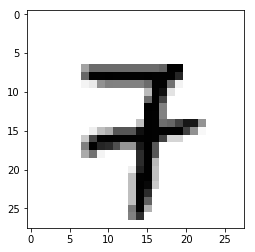

label 7


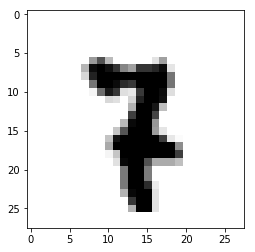

label 7


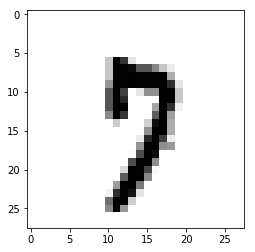

label 7


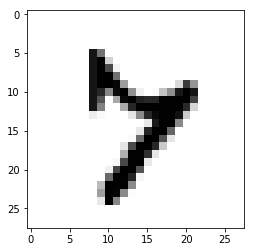

label 7


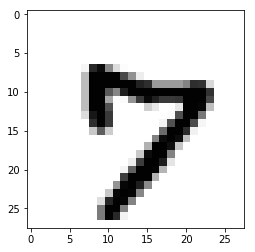

label 7


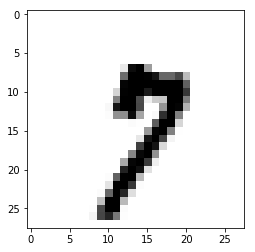

label 7


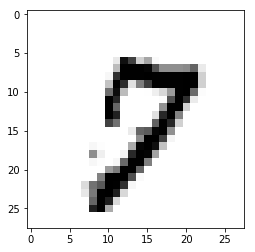

label 7


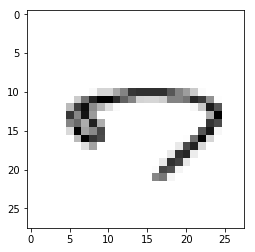

label 7


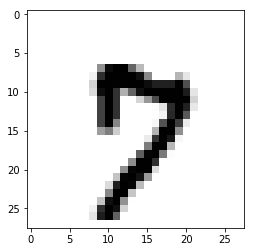

label 7


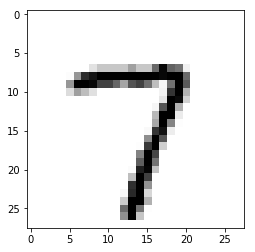

label 7


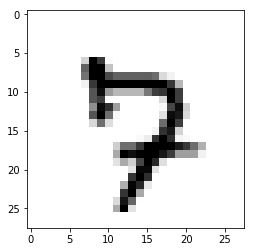

label 7


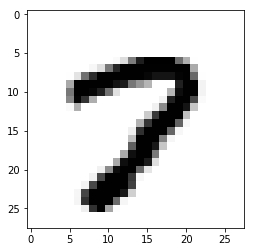

label 7


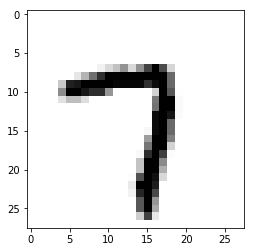

label 7


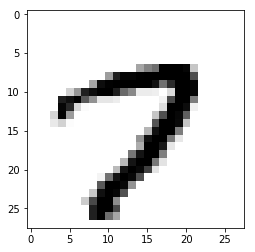

label 7


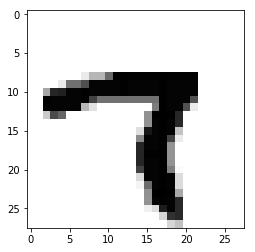

label 7


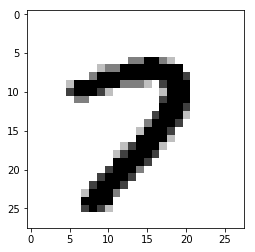

label 7


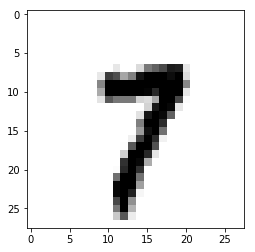

label 7


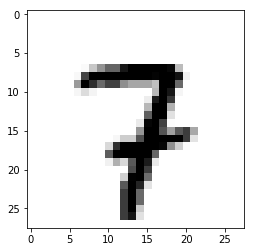

label 7


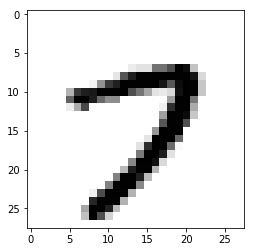

label  0


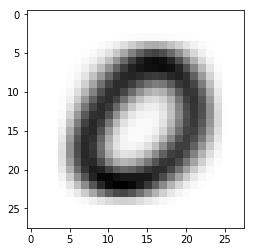

label  1


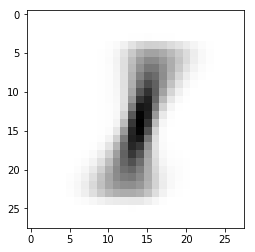

label  2


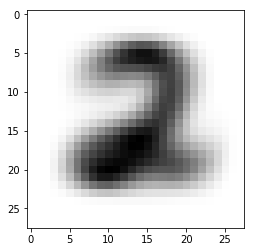

label  3


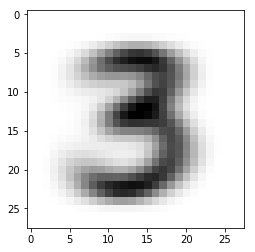

label  4


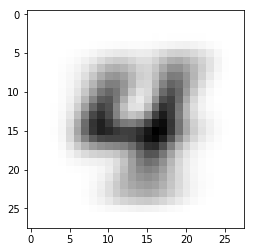

label  5


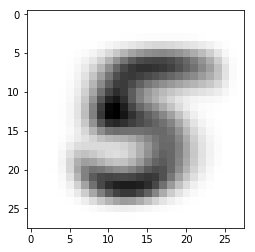

label  6


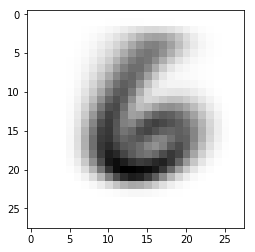

label  7


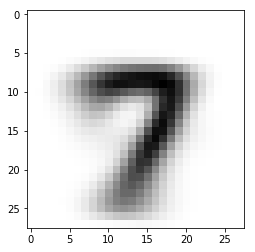

label  8


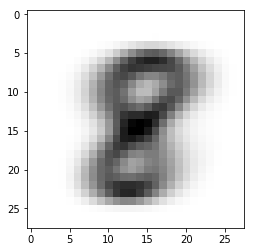

label  9


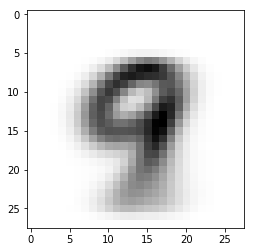

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.135
0.8777
0.8854
0.9001
0.901
0.9052
0.9104
0.91
0.9123
0.9
0.9071
0.9121
0.9043
0.9112
0.9101
0.9106
0.9133
0.9144
0.9122
0.9019
0.9116
0.9176
0.9152
0.9124
0.9189
0.9188
0.9189
0.9193
0.9222
0.9206
0.9182
0.9114
0.916
0.9196
0.9175
0.9056
0.9178
0.9162
0.911
0.906
0.9208
0.9141
0.9136
0.918
0.9162
0.9113
0.9189
0.9166
0.9172
0.9201
0.9213
0.9194
0.9217
0.9198
0.9213
0.9226
0.9205
0.9178
0.9197
0.9221


In [1]:
# !/usr/bin/env python3.5
# -*- coding: utf-8 -*-
# MNIST data set introduction is shown in the link below:
# One layer neural network is used to do the training and the acurancy can 
# achieve to 92%.
# http://yann.lecun.com/exdb/mnist/
import numpy as np
import matplotlib.pyplot as plt

# MNIST is a very well known database of scanned and labelled handwritten
# digits. Tensorflow has a handy built in routine to donwload it and
# translate it into a Python data structure. The default is to store
# the labels in one-hot form, which we'll use later, but for now
# we'll load them in as actual digits to make it easier for us to 
# eelect elements.

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)  
print ("type of mnist",type(mnist))
# The data for each image is a 28x28 matrix of greyscale pixels, ranging
# from 0 (white) to 1 (black). Tensorflow stores this as a 1D vector
# of 784 pixels, which is how we want to use it for our neural network, 
# but for now we'll reshape it back into a 28x28 matrix so we can 
# visualise the data
images_original=mnist.train.images
print("type of original images",type(images_original))
print("shape of original images",images_original.shape)
images = mnist.train.images.reshape(-1,28,28)
print("type of images",type(images))
print("shape of images",images.shape)
labels = mnist.train.labels
print("type of labels",type(labels))
print("shape of labels",labels.shape)
# Let's take a look at the first image on the list, which happens to be
# a '7'. The '0=white, 1=black' convention used in this data is the
# opposite of the usual convention where 0=black, 1=white, so we
# use a reversed greyscale colour map (gray_r) to display the image

plt.imshow(images[0],cmap=plt.cm.gray_r)
print("label 1")
plt.show()
# Pull out the first twenty '7's on the list and view them, to get some
# idea of the variatio we're dealing with

for img in images[labels==7][0:20]:
    plt.figure()
    plt.imshow(img,cmap=plt.cm.gray_r)
    print("label 7")
    plt.show()
# Now let's plot the mean of each of the ten digits
for l in range(0,10):
    plt.figure()
    plt.imshow(images[labels==l].mean(axis=0), cmap=plt.cm.gray_r)
    print("label ",l)
    plt.show()
    
# NOw for the actual neural network bit. We reload the data with 
# one hot label encodings, ready to commpare to our output vector. 
# We'll have a single layer network with 784 inputs (one per pixel)
# and ten neurons (one output per digit category)

import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  

# Remember that, unlike the Python libraries we've used so far, we're
# not running functions immediately. We'r esetting up a 'graph' of the 
# operations we want TensorFlow to perform, and we'll submit it later
# (wuth .run())

# First we set up the TensorFlow session which will run all our 
# oprations for us. 
sess = tf.Session()

# We set up the entire neural network in just these four lines. 
# We have inputs, which will be fed into the neural network, so
# we use a placeholder;  and weights and biases, which represent the main
# internal state of the network, so we decalare those as TensorFlow
# variables. The final line defines the sequence of operations to
# run our neural network: O = f(W.I + b) Beacuse we'll be using the
# outputs directly instad of feeding them into another netrwork layer,
# we don't use one of the typical nonlinear functions (RelU, sigmonid, etc)
# but rahter softmax, which scales the outputs to probababiliy values
# that sum to 1

inputs = tf.placeholder(tf.float32, [None, 784])
weights = tf.Variable(tf.truncated_normal([784, 10]))
biases = tf.Variable(tf.zeros([10]))
out = tf.nn.softmax(tf.matmul(inputs, weights) + biases)

# Having defined our neural network, we define the structure for our 
# training here. For each training run, we'll be comparing the output
# of the network to the relevant label, so we define a placeholder for
# the labels (remember: we use placeholders for things we feed in to
# TensorFlow from outside and variables for things TensorFlow needs
# to keep track of internally between runs)

labels = tf.placeholder(tf.float32, [None, 10])

# We'll use cross entropy as the basis of our loss function, and 
# set up training to minimize this using gradient descent. The 0.01
# represents the learning rate

cross_entropy = -tf.reduce_sum(labels*tf.log(out))

# sess.graph contains the graph definition; that enables the Graph Visualizer.

#file_writer = tf.summary.FileWriter('/Users/jimmy/Dropbox/tensorflow/logs', sess.graph)

train = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Up to this point, all we've done is _define_ what we want to do; 
# nothing has actually run in TensorFlow yet. The TensorFlow session
# has kept track of all the variables we've defined (wights and biases,
# in this case) so first we run a tiny TensorFlow graph to initialize
# them to the values we specified (random for weights, zero for biases)
init = tf.initialize_all_variables()
sess.run(init)

# Finally, let's define a TensorFlow workflow to calculate the 
# success rate of our network by running it (in the forwards direction
# only) on a separate set of test data. Argmax picks index of the largest 
# value in each of the vectors (thus the network's prediction in the
# output vector and the correct label in the label vector). We compare them
# with tf.equal, which evalueates to 1 when the indices are the same
# (correct prediction) and a 0 otherwise (incorrect prodection). 
# Taking the mean of these gives is the % correct

evaluate = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(out,1), tf.argmax(labels,1)), tf.float32))


# Run 20000 training runs. We use an internal TensorFlow function to 
# randomly select batches of 100 images per run, and every 500 runs
# we'll print out the state of the evaluation function so we can 
# visualise the learning behaviour of the network

for i in range(30000):
  features, l = mnist.train.next_batch(100)
  sess.run(train, feed_dict={inputs: features, labels: l})
  if i%500 == 0:
      print (sess.run(evaluate, feed_dict={inputs: mnist.test.images, labels: mnist.test.labels}))